<a href="https://colab.research.google.com/github/balwanthr/house-price-prediction/blob/main/Heart_Disease_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import zipfile

# Extract the files from the zip
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

# List the files in the extracted folder
extracted_files = zip_ref.namelist()
extracted_files

['Heart_Disease_Prediction.csv']

In [3]:
df_heart_disease = pd.read_csv('Heart_Disease_Prediction.csv')
print(df_heart_disease.head())


   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

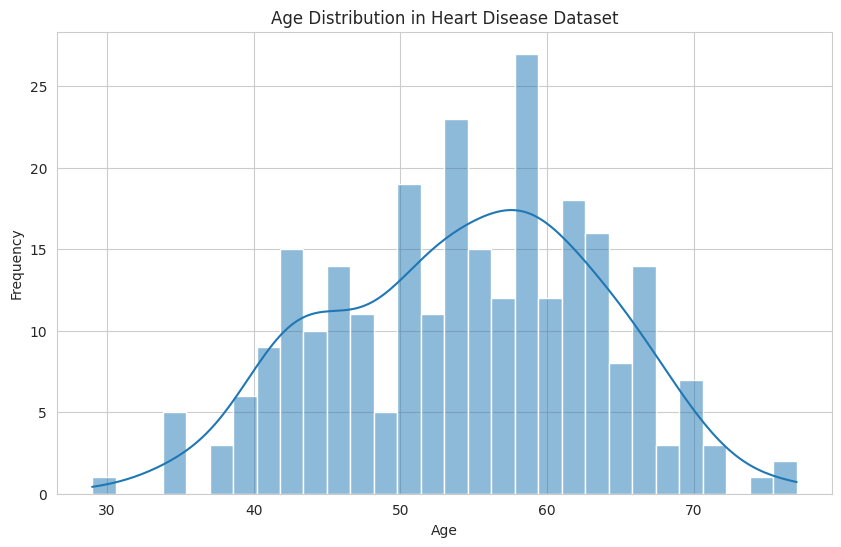

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot the distribution of age
plt.figure(figsize=(10, 6))
age_dist_plot = sns.histplot(df_heart_disease['Age'], bins=30, kde=True)
age_dist_plot.set_title('Age Distribution in Heart Disease Dataset')
age_dist_plot.set_xlabel('Age')
age_dist_plot.set_ylabel('Frequency')

plt.show()

In [5]:
df_heart_disease.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [6]:
df_heart_disease.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df_heart_disease['Sex'] = label_encoder.fit_transform(df_heart_disease['Sex'])
df_heart_disease['Exercise angina'] = label_encoder.fit_transform(df_heart_disease['Exercise angina'])
df_heart_disease['Heart Disease'] = label_encoder.fit_transform(df_heart_disease['Heart Disease'])

# Split the data into features and target variable
X = df_heart_disease.drop('Heart Disease', axis=1)
y = df_heart_disease['Heart Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 0.108619363816405
R^2 Score: 0.5429522873179843


In [11]:
from IPython.display import HTML

# Create a simple form for the frontend
input_form = """
<form action="/predict" method="post">
  Age: <input type="text" name="Age"><br>
  Sex (0 for female, 1 for male): <input type="text" name="Sex"><br>
  Chest pain type (1-4): <input type="text" name="Chest pain type"><br>
  BP: <input type="text" name="BP"><br>
  Cholesterol: <input type="text" name="Cholesterol"><br>
  FBS over 120 (0 for no, 1 for yes): <input type="text" name="FBS over 120"><br>
  EKG results (0-2): <input type="text" name="EKG results"><br>
  Max HR: <input type="text" name="Max HR"><br>
  Exercise angina (0 for no, 1 for yes): <input type="text" name="Exercise angina"><br>
  ST depression: <input type="text" name="ST depression"><br>
  Slope of ST (1-3): <input type="text" name="Slope of ST"><br>
  Number of vessels fluro (0-3): <input type="text" name="Number of vessels fluro"><br>
  Thallium (3-7): <input type="text" name="Thallium"><br>
  <input type="submit">
</form>
"""

# Display the form
HTML(input_form)
